In [71]:
#qiskit imports
from qiskit_aer import AerSimulator
from qiskit.circuit.library import RealAmplitudes
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler, QiskitRuntimeService
from qiskit import QuantumCircuit

In [72]:
#plotting imports
from matplotlib import pyplot as plt

In [73]:
#current circuit imports
from current_circuit import *

In [74]:
#create quantum circuit
quantum_circuitc = current_circuit()
qc = quantum_circuitc.get_current_circuit()

#without noise

In [75]:
#run the simulation without noise
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
run_qc = pm.run(qc)
with Session(backend=aer_sim) as session:
    sampler = Sampler()
    result = sampler.run([run_qc]).result()

In [76]:
"""qc.cregs"""

'qc.cregs'

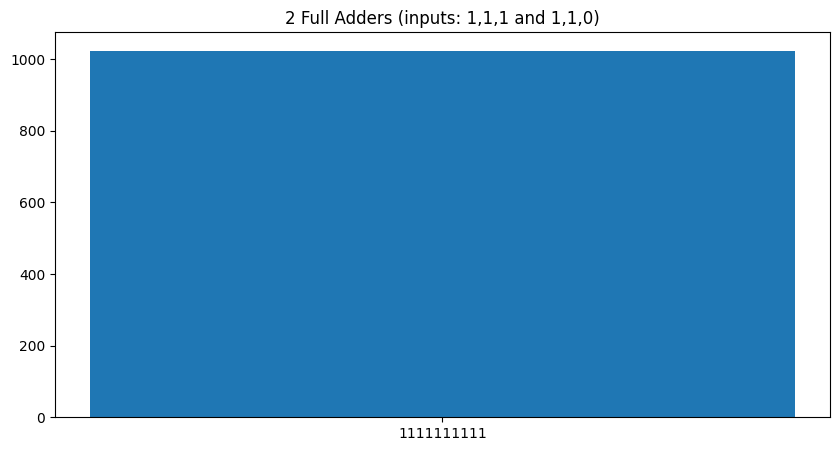

In [77]:
#plot results and save image
data = result[0].data.c.get_counts()
names = list(data.keys())
values = list(data.values())

plt.figure(figsize=(10,5))
plt.title("2 Full Adders (inputs: 1,1,1 and 1,1,0)")
plt.bar(range(len(data)), values, tick_label=names)
plt.savefig("results/simulation-without-noise.png", bbox_inches="tight")
plt.show()

In [78]:
results = list(result[0].data.c.get_counts().keys())[0]
carry_out = results[0]
sum = results[1]
print("Carry Out:",carry_out,", Sum:",sum)

Carry Out: 1 , Sum: 1


#simulation with noise

In [79]:
#connect to your ibm_quantum account
service = QiskitRuntimeService()

real_backend = service.backend("ibm_brisbane")
aer = AerSimulator.from_backend(real_backend)
 
# Run the sampler job locally using AerSimulator.
pass_manager = generate_preset_pass_manager(backend=aer, optimization_level=1)
qc_transpiled = pass_manager.run(qc)
sampler = Sampler(mode=aer)
noiseresult = sampler.run([qc_transpiled]).result()

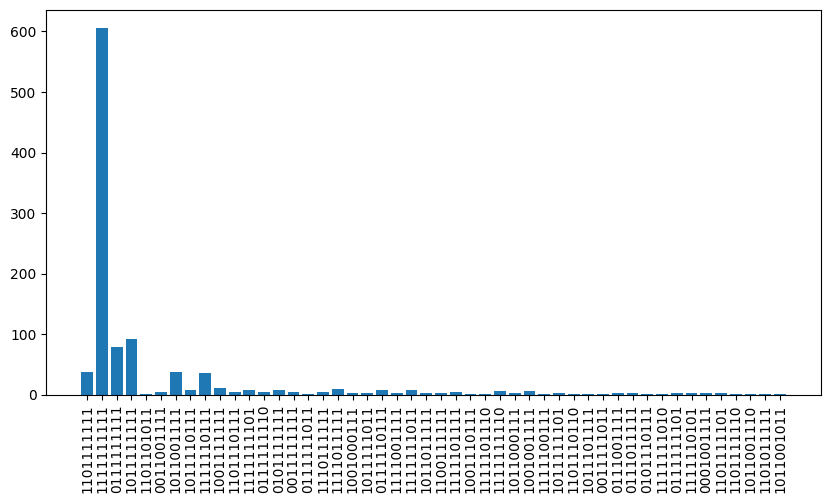

In [ ]:
#plot results and save image
data = noiseresult[0].data.c.get_counts()
names = list(data.keys())
values = list(data.values())

plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.title("2 Full Adders (inputs: 1,1,1 and 1,1,0)")
plt.bar(range(len(data)), values, tick_label=names)
plt.savefig("results/simulation-with-noise.png", bbox_inches="tight")
plt.show()

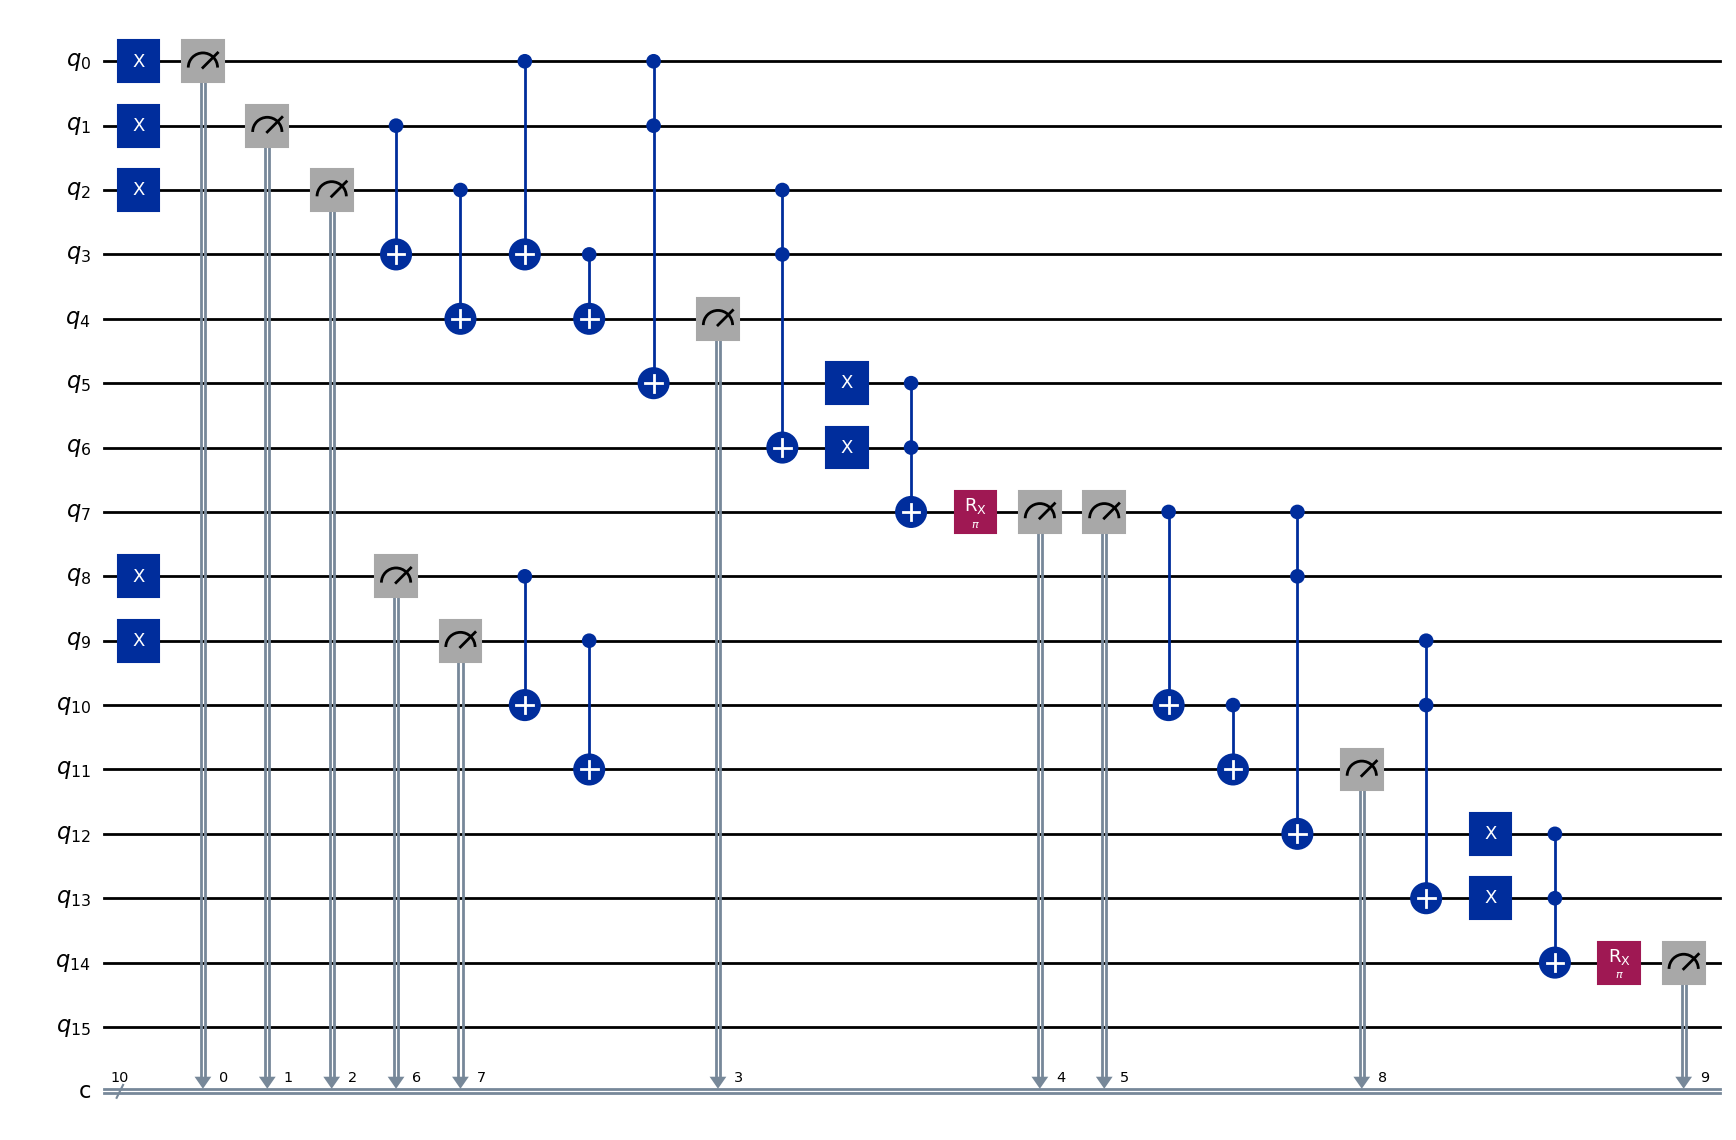

In [ ]:
qc.draw(output='mpl',style='iqp')